Добавлен новый слой с количеством нейронов равным 256. В данном случае, добавление нового слоя для обработки лишь ухудшило результаты работы сети.

In [1]:
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='softmax'))
network.add(layers.Dense(10, activation='softmax'))

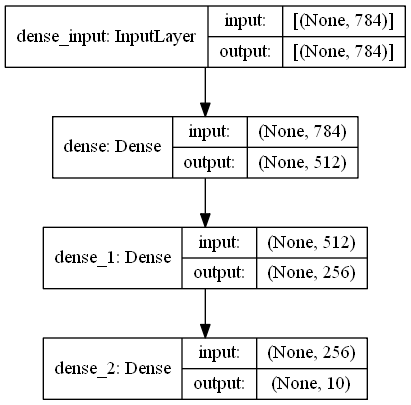

In [3]:
keras.utils.plot_model(network, show_shapes=True, show_layer_names=True)

In [4]:
# Назначение функции потерь и оптимизатора
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
469/469 - 4s - loss: 1.8831 - accuracy: 0.5573
Epoch 2/5
469/469 - 3s - loss: 1.3734 - accuracy: 0.5848
Epoch 3/5
469/469 - 3s - loss: 1.0411 - accuracy: 0.5894
Epoch 4/5
469/469 - 3s - loss: 0.8555 - accuracy: 0.5944
Epoch 5/5
469/469 - 3s - loss: 0.7604 - accuracy: 0.5974


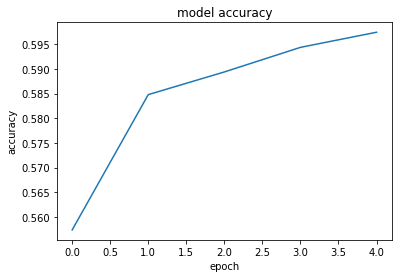

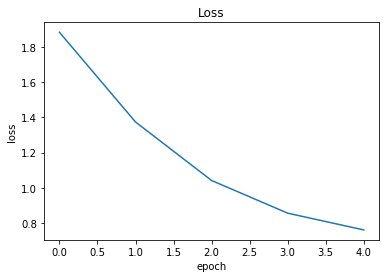

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.7457 - accuracy: 0.6143
